## Parameter loading
Load per-scenario/budget parameters (rho_min, rho_max, risk_min) from `results/data/online solutions/algorithm_parameters.csv`.

In [8]:

import pandas as pd
from pathlib import Path

REPO_ROOT = Path.cwd().resolve()
for parent in [REPO_ROOT] + list(REPO_ROOT.parents):
    if (parent / "src" / "motion_planning").exists():
        REPO_ROOT = parent
        break

param_path = REPO_ROOT / "results/data/online solutions/algorithm_parameters.csv"
PARAMS_BY_SCENARIO = {}
if param_path.exists():
    param_df = pd.read_csv(param_path)
    PARAMS_BY_SCENARIO = {(row["scenario"], float(row["budget"]),row["risk_label"]): row for _, row in param_df.iterrows()}
    print(f"Loaded {len(PARAMS_BY_SCENARIO)} scenario/budget rows from {param_path}")
    display(param_df)
else:
    print(f"Param file missing: {param_path}")


Loaded 5 scenario/budget rows from /home/abdulrahman/competitive-online-algorithms-motion-planning/results/data/online solutions/algorithm_parameters.csv


,scenario,budget,risk_label,rho_min,rho_max,risk_min
0,Town01_T-Intersection,10.0,high,133.563820,538.703988,0.488480
1,Town03_Roundabout,10.0,high,141.509006,2091.035401,0.122094
2,Town05_Highway1,10.0,high,121.436795,901.567134,0.436387
3,Town05_Highway2,10.0,high,158.293441,97665.537693,0.003000
4,Town05_Highway3,10.0,high,294.217479,1344.199931,0.216218


## CZL threshold curve
Sweep z in [0,1] and plot ψ_czl(z) for budgets 10 and 15 using the loaded parameters.

In [9]:

from pathlib import Path
import sys
import pandas as pd

# Locate repo root (assumes running somewhere inside the repo)
cwd = Path.cwd().resolve()
REPO_ROOT = cwd
for parent in [cwd] + list(cwd.parents):
    if (parent / "src" / "motion_planning").exists():
        REPO_ROOT = parent
        break

# Ensure src on path
src_path = REPO_ROOT / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print("Repo root:", REPO_ROOT)
print("sys.path[0]:", sys.path[0])


Repo root: /home/abdulrahman/competitive-online-algorithms-motion-planning
sys.path[0]: /home/abdulrahman/competitive-online-algorithms-motion-planning/src


In [ ]:

# Prep: locate files and helpers
import pandas as pd
from pathlib import Path

# Reuse REPO_ROOT if defined; otherwise infer
if 'REPO_ROOT' not in globals():
    REPO_ROOT = Path.cwd().resolve()
    for parent in [REPO_ROOT] + list(REPO_ROOT.parents):
        if (parent / 'src' / 'motion_planning').exists():
            REPO_ROOT = parent
            break

SEARCH_BASES = [REPO_ROOT / 'results', REPO_ROOT / 'src/motion_planning/offline_problems/results']

def find_files(pattern: str):
    hits = []
    for base in SEARCH_BASES:
        if base.exists():
            hits.extend(base.rglob(pattern))
    return sorted(set(hits))

risk_labels = {"low","mid","medium","high","veryhigh","very_high","very"}

def parse_scenario_from_stem(stem: str):
    parts = stem.split('_')
    risk_idx = next((i for i,p in enumerate(parts) if p.lower() in risk_labels), None)
    if risk_idx is None or risk_idx < 1:
        return stem
    scen_parts = parts[1:risk_idx-1] if parts[0].lower().startswith('iter') else parts[:risk_idx-1]
    scen = '_'.join(scen_parts) or stem
    return scen

# Gather artifacts
cand_files = find_files("*_candidates.csv")
offline_cand_opt = find_files('*_offline_candidates_opt.csv')
offline_edges = find_files('*_edge_values.csv')
offline_timeline = find_files('*_decision_timeline.csv')

# Candidate locations to search (new root results + legacy src path)
SEARCH_BASES = [
    REPO_ROOT / "results",
    REPO_ROOT / "src/motion_planning/offline_problems/results",
]

print(f"Candidate files: {len(cand_files)} files")
print(f"offline candidates opt: {len(offline_cand_opt)} files")
print(f"edge_values: {len(offline_edges)} files")
print(f"decision_timeline: {len(offline_timeline)} files")

Candidate files: 1600 files
offline candidates opt: 1600 files
edge_values: 1600 files
decision_timeline: 1600 files


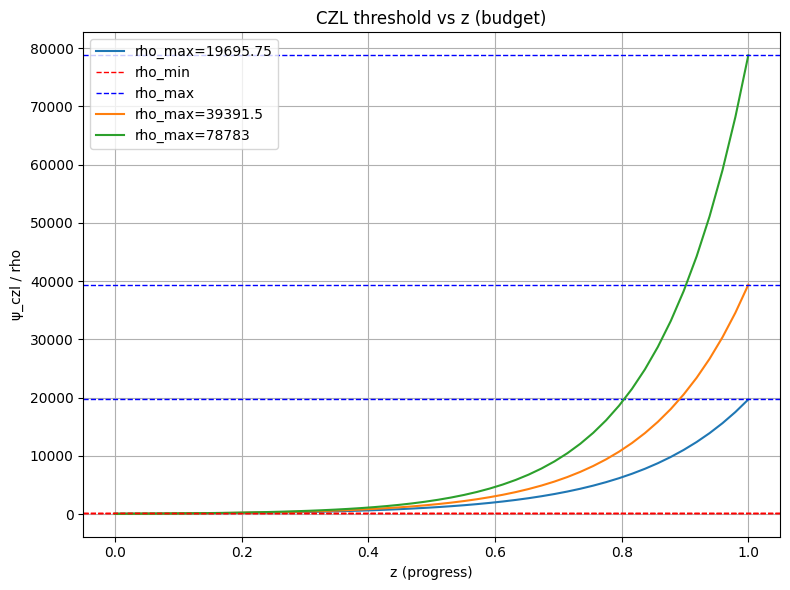

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from motion_planning.online_algorithms.thresholds import czl_psi

zs = np.linspace(0, 1, 50)
# rho_min = 0.0001 'rho_min_avg': 183.94786878889022, 'rho_max_avg': 78783.16161293154,
rho_min = 183
rho_max = 78783
rho_max_list = [rho_max/4, rho_max/2, rho_max]
plt.figure(figsize=(8, 6))
for rho_max in rho_max_list:
    psi_vals = [czl_psi(z, rho_min, rho_max) for z in zs]
    plt.plot(zs, psi_vals, label=f"rho_max={rho_max}")
    plt.axhline(rho_min, color='red', linestyle='--', linewidth=1, label='rho_min' if rho_max == rho_max_list[0] else None)
    plt.axhline(rho_max, color='blue', linestyle='--', linewidth=1, label='rho_max' if rho_max == rho_max_list[0] else None)

plt.xlabel("z (progress)")
plt.ylabel("ψ_czl / rho")
plt.title("CZL threshold vs z (budget)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [79]:
import math

import numpy as np
import matplotlib.pyplot as plt
from motion_planning.online_algorithms.thresholds import czl_psi

rho_min= 312.94786878889022
# rho_max= 78783.16161293154
rho_max= 979.16161293154
print("rho min:", rho_min)
print("modified rho min:", rho_min * math.e)
print (czl_psi(0.0, rho_min*math.e, rho_max))
print (czl_psi(0.1, rho_min, rho_max))
print (czl_psi(0.2, rho_min, rho_max))
print (czl_psi(0.3, rho_min, rho_max))
print (czl_psi(0.4, rho_min, rho_max))
print (czl_psi(0.5, rho_min, rho_max))
print (czl_psi(0.6, rho_min, rho_max))
print (czl_psi(0.7, rho_min, rho_max))
print (czl_psi(0.8, rho_min, rho_max))
print (czl_psi(0.9, rho_min, rho_max))
# print (rho_min)
# print(f'at z = 0 :  {rho_min /math.e}')
# print (czl_psi(0.1, rho_min, rho_max))
print (czl_psi(1.0, rho_min, rho_max))

print("rho max:", rho_max)
print (rho_max)
z=0.2
print((((rho_max * math.e) / rho_min) ** (1*z)) * (rho_min / math.e))

rho min: 312.9478687888902
modified rho min: 850.6805049838258
312.9478687888902
142.60843130617263
176.64969378094176
218.81675597359867
271.0492821696313
335.74994308724985
415.89493755804426
515.1708962210038
638.1444647330233
790.4723672408298
979.16161293154
rho max: 979.16161293154
979.16161293154
176.64969378094176


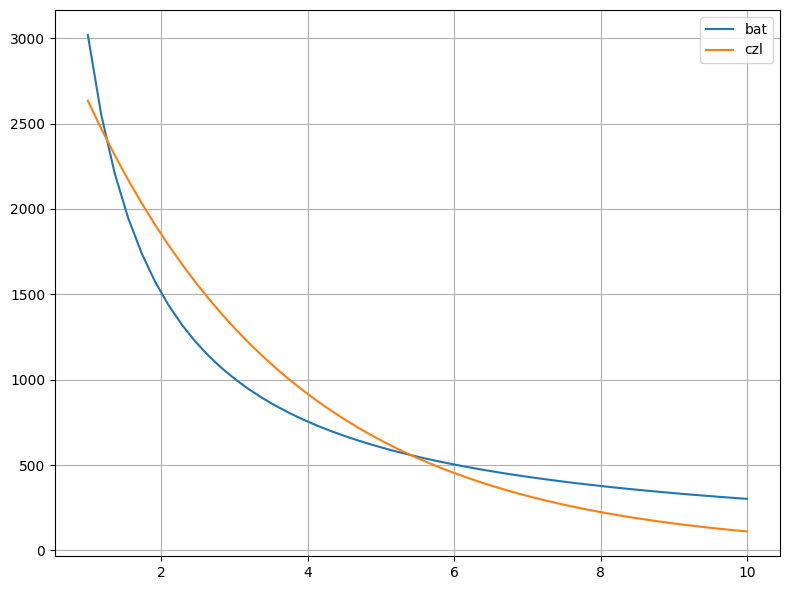

In [ ]:
def bat_threshold(delta_0, delta_t,rho_min):
    return ((delta_0/delta_t) * rho_min)

def from_z_to_remaining(z, delta_0):
    # z = 1 - (delta_t / delta_0)
    # delta_t = delta_0 * (1 - z)
    return delta_0 * (1 - z)
def from_remaining_to_z(remaining, delta_0):
    return 1 - (remaining / delta_0)

import numpy as np
import matplotlib.pyplot as plt
from motion_planning.online_algorithms.thresholds import czl_psi
# from motion_planning.online_algorithms.thresholds import bat_threshold

delta_0 = 10
zs = np.linspace(0, 1, 50)
remaining = np.linspace(1, delta_0, 50)
# rho_min = 0.0001
rho_min = 302
plt.figure(figsize=(8, 6))
psi_vals_bat = [bat_threshold(delta_0=delta_0,delta_t=delta_t, rho_min=rho_min ) for delta_t in remaining]
psi_vals_czl = [czl_psi(z=from_remaining_to_z(delta_t,delta_0=delta_0), rho_min=rho_min, rho_max=rho_max) for delta_t in remaining]
plt.plot(remaining, psi_vals_bat, label="bat")
plt.plot(remaining, psi_vals_czl, label="czl")

    # plt.axhline(rho_min, color='red', linestyle='--', linewidth=1, label='rho_min' if rho_max == rho_max_list[0] else None)
    # plt.axhline(rho_max, color='blue', linestyle='--', linewidth=1, label='rho_max' if rho_max == rho_max_list[0] else None)

# plt.xlabel("z (progress)")
# plt.ylabel("ψ_czl / rho")
# plt.title("CZL threshold vs z (budget)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_325738/2525439712.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return min(((delta_0/delta_t) * rho_min), rho_max)


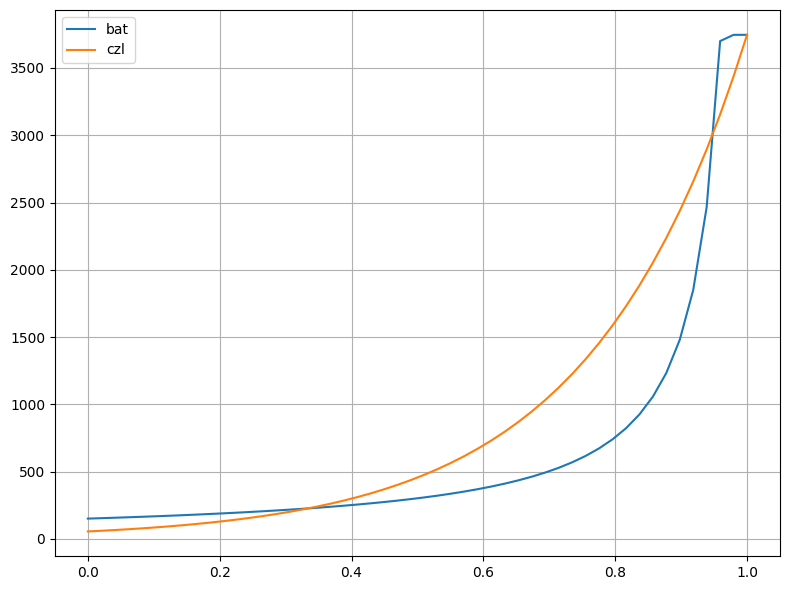

In [ ]:
def bat_threshold(delta_0, delta_t,rho_min, rho_max):
    return min(((delta_0/delta_t) * rho_min), rho_max)

def from_z_to_remaining(z, delta_0):
    # z = 1 - (delta_t / delta_0)
    # delta_t = delta_0 * (1 - z)
    return delta_0 * (1 - z)

def from_remaining_to_z(remaining, delta_0):
    return 1 - (remaining / delta_0)

import numpy as np
import matplotlib.pyplot as plt
from motion_planning.online_algorithms.thresholds import czl_psi
# from motion_planning.online_algorithms.thresholds import bat_threshold

delta_0 = 10
zs = np.linspace(0, 1, 50)
remaining = np.linspace(0.0, delta_0, 50)
# rho_min = 0.0001
rho_min = 302*0.5
plt.figure(figsize=(8, 6))
psi_vals_bat = [bat_threshold(delta_0=delta_0,delta_t=from_z_to_remaining(z,delta_0), rho_min=rho_min, rho_max=rho_max ) for z in zs]
psi_vals_czl = [czl_psi(z=z, rho_min=rho_min, rho_max=rho_max) for z in zs]
plt.plot(zs, psi_vals_bat, label="bat")
plt.plot(zs, psi_vals_czl, label="czl")

    # plt.axhline(rho_min, color='red', linestyle='--', linewidth=1, label='rho_min' if rho_max == rho_max_list[0] else None)
    # plt.axhline(rho_max, color='blue', linestyle='--', linewidth=1, label='rho_max' if rho_max == rho_max_list[0] else None)

# plt.xlabel("z (progress)")
# plt.ylabel("ψ_czl / rho")
# plt.title("CZL threshold vs z (budget)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
PARAMS_BY_SCENARIO

{('Town01_T-Intersection',
  10.0): scenario      Town01_T-Intersection
 budget                         10.0
 risk_label                   medium
 rho_min                  172.969149
 rho_max                98808.849131
 risk_min                      0.003
 Name: 2, dtype: object,
 ('Town01_T-Intersection',
  15.0): scenario      Town01_T-Intersection
 budget                         15.0
 risk_label                   medium
 rho_min                  122.862171
 rho_max                98881.391692
 risk_min                      0.003
 Name: 5, dtype: object,
 ('Town01_T-Intersection',
  20.0): scenario      Town01_T-Intersection
 budget                         20.0
 risk_label                   medium
 rho_min                  107.791846
 rho_max                98881.391692
 risk_min                      0.003
 Name: 8, dtype: object,
 ('Town01_T-Intersection',
  25.0): scenario      Town01_T-Intersection
 budget                         25.0
 risk_label                   medium
 rho_min

File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 0 rho=926.1230 risk: 0.3607
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 1 rho=692.7537 risk: 0.4826
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 2 rho=470.0709 risk: 0.7121
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 3 rho=301.9148 risk: 1.1095
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 4 rho=192.0087 risk: 1.7458
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 5 rho=3468.0165 risk: 0.1878
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 6 rho=2157.3813 risk: 0.3020
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 7 rho=1226.2141 risk: 0.5467
File iter10_Town01_T-Intersection_10_high_5_candidates.csv, budget=10.0: candidate 8 rho=928.4122 risk: 0.723

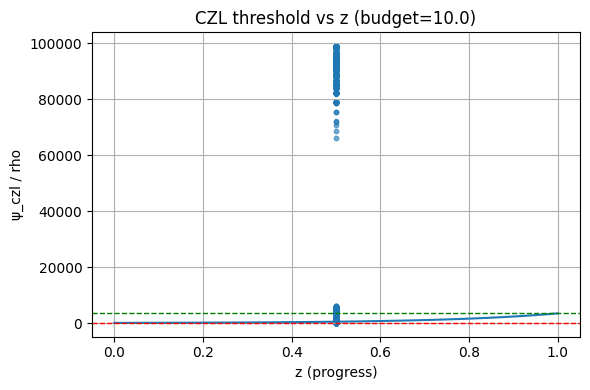

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from motion_planning.online_algorithms.thresholds import czl_psi

# budgets = [10.0, 15.0, 20.0, 25.0]
budgets = [10.0]

scenarios=["Town01_T-Intersection"] 

def pick_params_for_budget(budget, scenario, risk_label):
    for (scen, b, risk_label, iteration_index), row in PARAMS_BY_SCENARIO.items():
        if b == budget and scen == scenario and risk_label == risk_label:
            return row
    return next(iter(PARAMS_BY_SCENARIO.values()), None)
def pick_params_for_budget_and_scenario(budget, scenario):
    for (scen, b, risk_label, iteration_index), row in PARAMS_BY_SCENARIO.items():
        if b == budget and scen == scenario:
            print(row["rho_max"])
            return row
    return next(iter(PARAMS_BY_SCENARIO.values()), None)


for bud in budgets:
    for scen in scenarios:
        row = pick_params_for_budget(bud,scen, risk_label="high")
        # if not row:
        #     print(f"No params available to plot CZL psi for budget={bud}.")
        #     continue
        rho_min = row.get("rho_min")
        rho_max = row.get("rho_max")
        if rho_min is None or rho_max is None or rho_min <= 0:
            print(f"Invalid rho bounds for budget={bud}: {rho_min}, {rho_max}")
            continue
        # Compute czl psi curve
        zs = np.linspace(0, 1, 50)
        # rho_min = 20.0
        # rho_max = 80.0
        psi_vals = [czl_psi(z, rho_min, rho_max) for z in zs]

        # Gather rho values from all offline candidates files matching this budget
        rho_points = []
        if 'cand_files' in globals():
            for f in cand_files:
                try:
                    df = pd.read_csv(f)
                except Exception:
                    continue
                # parse budget from filename to match
                parts = f.stem.split('_')
                for i,p in enumerate(parts):
                    try:
                        bval = float(p)
                    except Exception:
                        continue
                    if abs(bval - bud) < 1e-6:
                        # add positive-risk rho values
                        pos = df[df['risk'] > 0]
                        if not pos.empty:
                            rhos = (pos['utility'] / pos['risk']).astype(float)

                            # approximate z as linear fraction of list position
                            for idx, rho in enumerate(rhos):
                                print(f"File {f.name}, budget={bud}: candidate {idx} rho={rho:.4f} risk: {pos.iloc[idx]['risk']:.4f}")
                                z_val = idx / max(1, len(rhos)-1)
                                rho_points.append((z_val, rho))
                        # break

        plt.figure(figsize=(6, 4))
        plt.plot(zs, psi_vals, label=f"{row.get('scenario','?')} (Δ0={bud})")
        plt.axhline(rho_min, color='red', linestyle='--', linewidth=1, label='rho_min')
        plt.axhline(rho_max, color='green', linestyle='--', linewidth=1, label='rho_max')
        if rho_points:
            z_vals, rho_vals = zip(*rho_points)
            plt.scatter(len(z_vals)*[0.5], rho_vals, s=10, alpha=0.6, label='candidate rho')
        plt.xlabel("z (progress)")
        plt.ylabel("ψ_czl / rho")
        plt.title(f"CZL threshold vs z (budget={bud})")
        plt.grid(True)
        # plt.legend()
        plt.tight_layout()
        plt.show()


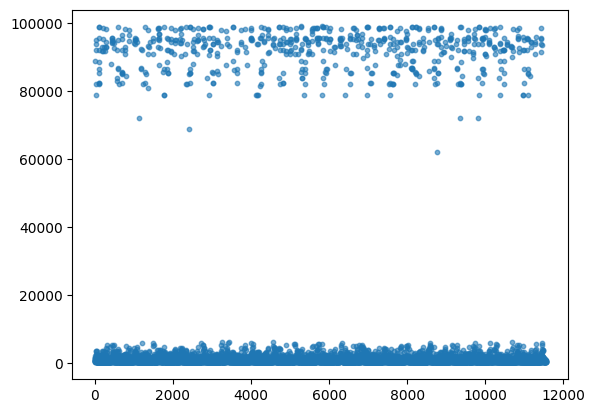

In [ ]:
if rho_points:
    z_vals, rho_vals = zip(*rho_points)
    plt.scatter(range(len(rho_vals)), rho_vals, s=10, alpha=0.6, label='candidate rho')


In [ ]:
rholist=[]
for r in rho_vals:
    if r > 20000:
        rholist.append(r)
        

print(len(rholist)) 

649


## BAT threshold curve
Plot ψ_bat = Δ_t / δ_min vs remaining budget for budgets 10 and 15.

/tmp/ipykernel_325738/745258413.py:22: RuntimeWarning: divide by zero encountered in divide
  psi_vals = (bud / remaining_vals) * math.log(1.0 + (bud / delta_min))


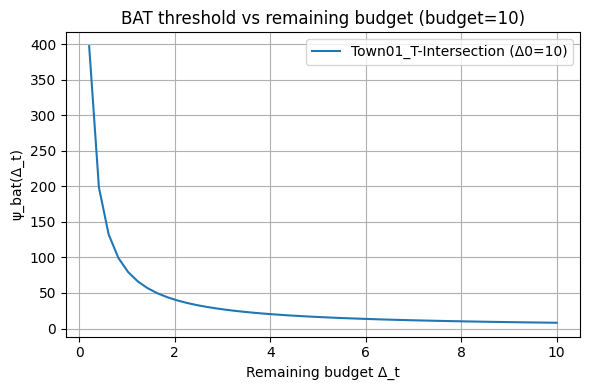

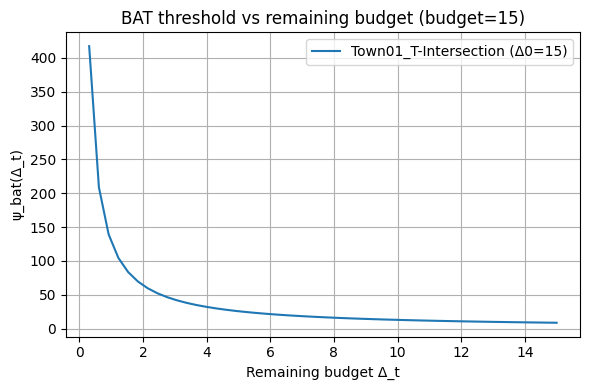

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import math
budgets = [10, 15]

def pick_params_for_budget(budget):
    for (scen, b), row in PARAMS_BY_SCENARIO.items():
        if abs(float(b) - budget) < 1e-6:
            return row
    return next(iter(PARAMS_BY_SCENARIO.values()), None)

for bud in budgets:
    row = pick_params_for_budget(bud)
    # if not row:
    #     print(f"No params available to plot BAT psi for budget={bud}.")
    #     continue
    delta_min = row.get("risk_min")
    if delta_min is None or delta_min <= 0:
        print(f"Invalid delta_min for budget={bud}: {delta_min}")
        continue
    remaining_vals = np.linspace(0, bud, 50)
    psi_vals = (bud / remaining_vals) * math.log(1.0 + (bud / delta_min))
    plt.figure(figsize=(6, 4))
    plt.plot(remaining_vals, psi_vals, label=f"{row.get('scenario','?')} (Δ0={bud})")
    plt.xlabel("Remaining budget Δ_t")
    plt.ylabel("ψ_bat(Δ_t)")
    plt.title(f"BAT threshold vs remaining budget (budget={bud})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
